In [ ]:
!pip install catboost

     |████████████████████████████████| 69.2MB 53kB/s 


In [ ]:
import os
import time
import pandas as pd
import re
import numpy as np
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn import svm
from nltk.corpus import stopwords
from scipy import sparse, hstack, vstack
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import string

In [ ]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing stopwords
#STOP_WORDS = stopwords.words('bengali')
stopWords = []
with open('/content/drive/MyDrive/research/bengali', 'r', encoding="utf8") as f:
    for row in f:  # iterate over the rows in the file
        row = row.replace("\n", "")
        stopWords.append(row)

In [ ]:
#striping punctuations
puncList = ["।", "”", "“", "’"]
for p in string.punctuation.lstrip():
    puncList.append(p)

In [ ]:
#word tokenizer
def tokenizer(doc):
    # remove punctuation
    tokens = []
    def cleanword(word):
        for p in puncList:
            word = word.replace(p, "")
        word = re.sub(r'[\u09E6-\u09EF]', "", word, re.DEBUG)  # replace digits

        return word

    for word in doc.split(" "):
        word = cleanword(word)
        if word != "":
            tokens.append(word)

    return tokens

In [ ]:
#importing dataset

# df = pd.read_csv("../Data/Corpus/AllDataTarget.csv")
df = pd.read_csv("/content/drive/MyDrive/research/TrainTest.csv")
df = df[df["articleID"] != 27753]
consistentID = set(df["articleID"])
print(df.shape)
head = list(df)
data = df.content

(49976, 8)


In [ ]:
count_word = CountVectorizer(min_df=5, ngram_range=(1, 1),
                                 stop_words=stopWords, decode_error='replace',
                                 encoding='utf-8', analyzer='word', tokenizer=tokenizer)


x_word = count_word.fit_transform(data.values.astype('U'))

In [ ]:
counttf_feature_names = count_word.get_feature_names()
counttf_feature_names[:8]

['0', '1', '16321', '18', '19', '2', '20', '2018']

In [ ]:
X = x_word
Y = df[["label"]]
print(X.shape)
print(Y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, Y.values.ravel(), test_size=0.3, random_state=109)

(49976, 72448)
(49976, 1)


## SVM with CountVectorizer

Accuracy: 0.9881944907623558
Precision: 0.9918205984595461
Recall: 0.9960980284775466
F1-Score: 0.9939547115680181
              precision    recall  f1-score   support

           0       0.82      0.69      0.75       385
           1       0.99      1.00      0.99     14608

    accuracy                           0.99     14993
   macro avg       0.91      0.84      0.87     14993
weighted avg       0.99      0.99      0.99     14993



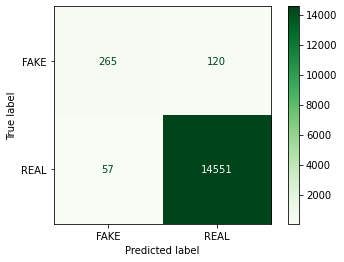

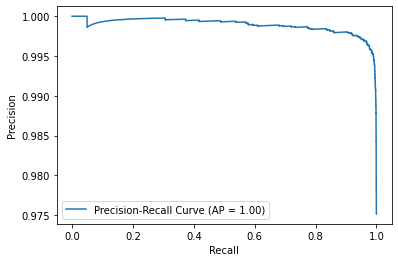

In [ ]:
# Creating SVM Classifier
start = time.time()
clf = svm.SVC(kernel='linear', C=10, cache_size=7000)

clf.fit(X_train, y_train)

#Save Model
# outfile = open("../API/model", 'wb')
# pickle.dump(clf, outfile)
# outfile.close()


y_pred = clf.predict(X_test)
end = time.time()
svc_time = end - start
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
svc_acc = round((100 * metrics.accuracy_score(y_test, y_pred)), 2)
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-Score:", metrics.f1_score(y_test, y_pred))
sv_fp, sv_tp, thresh = roc_curve(y_test, y_pred)
#print("Confusion Matrix:", metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
plot_confusion_matrix(clf, X_test, y_test, display_labels=['FAKE', 'REAL'], cmap='Greens', values_format="d")
plot_precision_recall_curve(clf, X_test, y_test, name='Precision-Recall Curve')

## LR with CountVectorizer

Accuracy: 0.9903288201160542
Precision: 0.9911035653650254
Recall: 0.9990416210295728
F1-Score: 0.9950567620086591
Confusion Matrix: [[  254   131]
 [   14 14594]]
              precision    recall  f1-score   support

           0       0.95      0.66      0.78       385
           1       0.99      1.00      1.00     14608

    accuracy                           0.99     14993
   macro avg       0.97      0.83      0.89     14993
weighted avg       0.99      0.99      0.99     14993



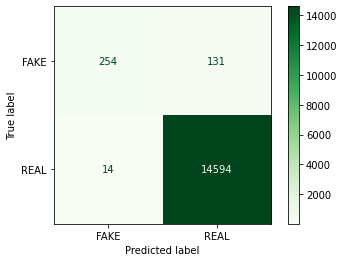

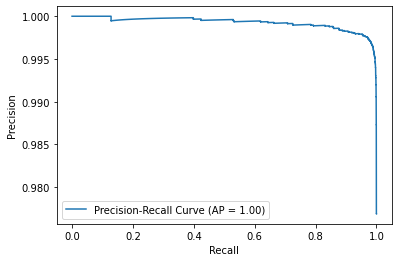

In [ ]:
# Logistic Regression
start = time.time()
lrclf = LogisticRegression()

lrclf.fit(X_train, y_train)

y_pred = lrclf.predict(X_test)
end = time.time()
lr_time = end - start
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
lr_acc = round((100 * metrics.accuracy_score(y_test, y_pred)), 2)
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-Score:", metrics.f1_score(y_test, y_pred))
print("Confusion Matrix:", metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
lr_fp, lr_tp, thresh = roc_curve(y_test, y_pred)
plot_confusion_matrix(lrclf, X_test, y_test, display_labels=['FAKE', 'REAL'], cmap='Greens', values_format="d")
plot_precision_recall_curve(lrclf, X_test, y_test, name='Precision-Recall Curve')

## MNB with CountVectorizer

In [ ]:
# tune the hyperparameter alpha for the naive bayes classifier
for alpha in np.arange(0,1,.05):
    mnb_classifier_tune = MultinomialNB(alpha=alpha)
    mnb_classifier_tune.fit(X_train, y_train)
    pred_tune = mnb_classifier_tune.predict(X_test)
    score = metrics.accuracy_score(y_test, pred_tune)
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.00 Score: 0.98259
Alpha: 0.05 Score: 0.96712
Alpha: 0.10 Score: 0.95918
Alpha: 0.15 Score: 0.95284
Alpha: 0.20 Score: 0.94798
Alpha: 0.25 Score: 0.94424
Alpha: 0.30 Score: 0.94177
Alpha: 0.35 Score: 0.94031
Alpha: 0.40 Score: 0.93931
Alpha: 0.45 Score: 0.93844
Alpha: 0.50 Score: 0.93764
Alpha: 0.55 Score: 0.93737
Alpha: 0.60 Score: 0.93750
Alpha: 0.65 Score: 0.93750
Alpha: 0.70 Score: 0.93804
Alpha: 0.75 Score: 0.93870
Alpha: 0.80 Score: 0.93864
Alpha: 0.85 Score: 0.93904
Alpha: 0.90 Score: 0.93937
Alpha: 0.95 Score: 0.93997


Accuracy: 0.9802574534782899
Precision: 0.9946771740633209
Recall: 0.9850082146768894
F1-Score: 0.9898190823416111
Confusion Matrix: [[  308    77]
 [  219 14389]]
              precision    recall  f1-score   support

           0       0.58      0.80      0.68       385
           1       0.99      0.99      0.99     14608

    accuracy                           0.98     14993
   macro avg       0.79      0.89      0.83     14993
weighted avg       0.98      0.98      0.98     14993



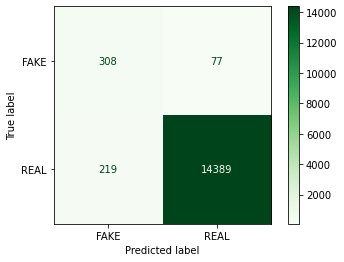

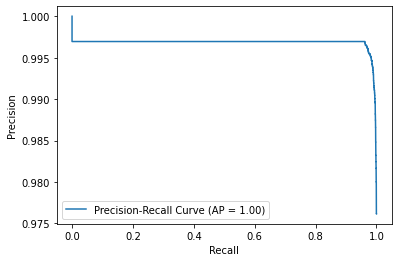

In [ ]:
# Multinomial Naive Bayes Classifier
start = time.time()
mnbclf = MultinomialNB(alpha = 0.01)

mnbclf.fit(X_train, y_train)

y_pred = mnbclf.predict(X_test)
end = time.time()
mnb_time = end - start
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
mnb_acc = round((100 * metrics.accuracy_score(y_test, y_pred)), 2)
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-Score:", metrics.f1_score(y_test, y_pred))
print("Confusion Matrix:", metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
mnb_fp, mnb_tp, thresh = roc_curve(y_test, y_pred)
plot_confusion_matrix(mnbclf, X_test, y_test, display_labels=['FAKE', 'REAL'], cmap='Greens', values_format="d")
plot_precision_recall_curve(mnbclf, X_test, y_test, name='Precision-Recall Curve')

## Passive Agressive Classifier With CountVectorizer

Accuracy: 0.9906623090775696
Precision: 0.9931152010906612
Recall: 0.9973302300109529
F1-Score: 0.9952182526128833
Confusion Matrix: [[  284   101]
 [   39 14569]]
              precision    recall  f1-score   support

           0       0.88      0.74      0.80       385
           1       0.99      1.00      1.00     14608

    accuracy                           0.99     14993
   macro avg       0.94      0.87      0.90     14993
weighted avg       0.99      0.99      0.99     14993



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


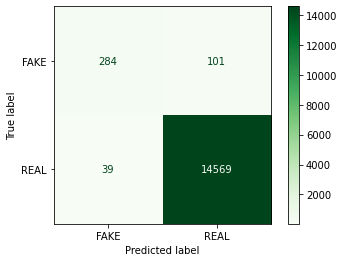

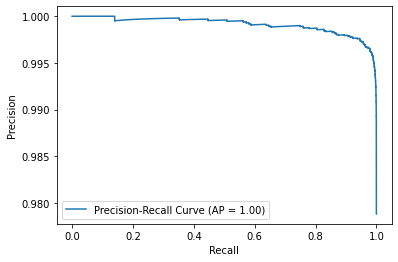

In [ ]:
# Passive Agressive Classifier
start = time.time()
linearclf = PassiveAggressiveClassifier(max_iter=10)

linearclf.fit(X_train, y_train)

y_pred = linearclf.predict(X_test)
end = time.time()
passive_time = end - start
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
passive_acc = round((100 * metrics.accuracy_score(y_test, y_pred)), 2)
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-Score:", metrics.f1_score(y_test, y_pred))
print("Confusion Matrix:", metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
passive_fp, passive_tp, thresh = roc_curve(y_test, y_pred)
plot_confusion_matrix(linearclf, X_test, y_test, display_labels=['FAKE', 'REAL'], cmap='Greens', values_format="d")
plot_precision_recall_curve(linearclf, X_test, y_test, name='Precision-Recall Curve')

## Random Forests with Count Vectorizer

Accuracy: 0.9747215367171347
Precision: 0.9747114165610196
Recall: 1.0
F1-Score: 0.9871937827335698
Confusion Matrix: [[    6   379]
 [    0 14608]]
              precision    recall  f1-score   support

           0       1.00      0.02      0.03       385
           1       0.97      1.00      0.99     14608

    accuracy                           0.97     14993
   macro avg       0.99      0.51      0.51     14993
weighted avg       0.98      0.97      0.96     14993



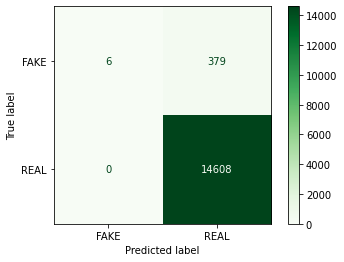

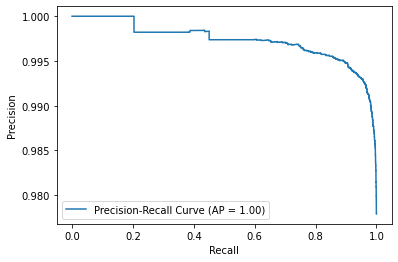

In [ ]:
# Random Forest Classifier
start = time.time()
forestclf = RandomForestClassifier(max_depth=10, random_state=0)

forestclf.fit(X_train, y_train)

y_pred = forestclf.predict(X_test)
end = time.time()
random_time = end - start
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
random_acc = round((100 * metrics.accuracy_score(y_test, y_pred)), 2)
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-Score:", metrics.f1_score(y_test, y_pred))
print("Confusion Matrix:", metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
random_fp, random_tp, thresh = roc_curve(y_test, y_pred)
plot_confusion_matrix(forestclf, X_test, y_test, display_labels=['FAKE', 'REAL'], cmap='Greens', values_format="d")
plot_precision_recall_curve(forestclf, X_test, y_test, name='Precision-Recall Curve')

## Neural Network with Count Vectorizer

Accuracy: 0.9920629627159341
Precision: 0.9927896061492415
Recall: 0.9991100766703176
F1-Score: 0.9959398137090995
Confusion Matrix: [[  279   106]
 [   13 14595]]
              precision    recall  f1-score   support

           0       0.96      0.72      0.82       385
           1       0.99      1.00      1.00     14608

    accuracy                           0.99     14993
   macro avg       0.97      0.86      0.91     14993
weighted avg       0.99      0.99      0.99     14993



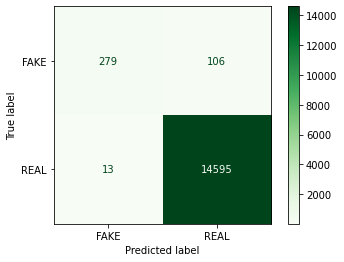

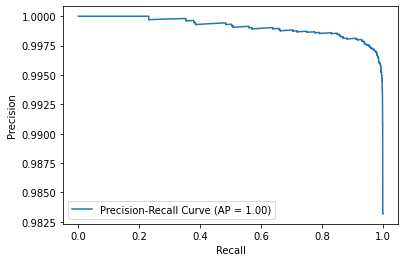

In [ ]:
#Neural Network MLP Classifier
start = time.time()
neuralclf=MLPClassifier(hidden_layer_sizes=(33,),max_iter=500)

neuralclf.fit(X_train, y_train)

y_pred = neuralclf.predict(X_test)
end = time.time()
nn_time = end - start
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
nn_acc = round((100 * metrics.accuracy_score(y_test, y_pred)), 2)
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-Score:", metrics.f1_score(y_test, y_pred))
print("Confusion Matrix:", metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
nn_fp, nn_tp, thresh = roc_curve(y_test, y_pred)
plot_confusion_matrix(neuralclf, X_test, y_test, display_labels=['FAKE', 'REAL'], cmap='Greens', values_format="d")
plot_precision_recall_curve(neuralclf, X_test, y_test, name='Precision-Recall Curve')

## KNN with Count Vectorizer

Accuracy: 0.9802574534782899
Precision: 0.9946771740633209
Recall: 0.9850082146768894
F1-Score: 0.9898190823416111
Confusion Matrix: [[  308    77]
 [  219 14389]]
              precision    recall  f1-score   support

           0       0.58      0.80      0.68       385
           1       0.99      0.99      0.99     14608

    accuracy                           0.98     14993
   macro avg       0.79      0.89      0.83     14993
weighted avg       0.98      0.98      0.98     14993



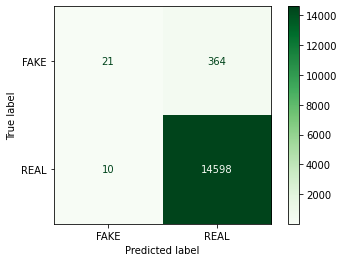

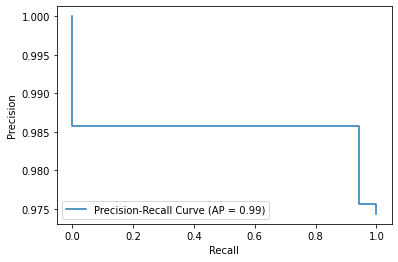

In [ ]:
# K-NearestNeighbour Classifier
start = time.time()
knnclf = KNeighborsClassifier(3)

knnclf.fit(X_train, y_train)

y_pred = mnbclf.predict(X_test)
end = time.time()
knn_time = end - start
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
knn_acc = round((100 * metrics.accuracy_score(y_test, y_pred)), 2)
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-Score:", metrics.f1_score(y_test, y_pred))
print("Confusion Matrix:", metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
knn_fp, knn_tp, thresh = roc_curve(y_test, y_pred)
plot_confusion_matrix(knnclf, X_test, y_test, display_labels=['FAKE', 'REAL'], cmap='Greens', values_format="d")
plot_precision_recall_curve(knnclf, X_test, y_test, name='Precision-Recall Curve')

## XGBoost Classifier With CountVectorizer

Accuracy: 0.9799239645167745
Precision: 0.9798108525051982
Recall: 1.0
F1-Score: 0.9898024867025782
Confusion Matrix: [[   84   301]
 [    0 14608]]
              precision    recall  f1-score   support

           0       1.00      0.22      0.36       385
           1       0.98      1.00      0.99     14608

    accuracy                           0.98     14993
   macro avg       0.99      0.61      0.67     14993
weighted avg       0.98      0.98      0.97     14993



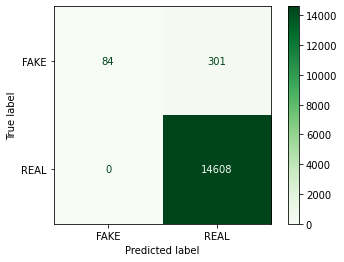

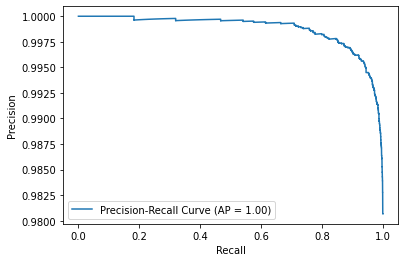

In [ ]:
# XGBoost Classifier
start = time.time()
xgbclf = XGBClassifier()

xgbclf.fit(X_train, y_train)

y_pred = xgbclf.predict(X_test)
end = time.time()
xgb_time = end - start
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
xgb_acc = round((100 * metrics.accuracy_score(y_test, y_pred)), 2)
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-Score:", metrics.f1_score(y_test, y_pred))
print("Confusion Matrix:", metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
xgb_fp, xgb_tp, thresh = roc_curve(y_test, y_pred)
plot_confusion_matrix(xgbclf, X_test, y_test, display_labels=['FAKE', 'REAL'], cmap='Greens', values_format="d")
plot_precision_recall_curve(xgbclf, X_test, y_test, name='Precision-Recall Curve')

## CatBoost Classifier With CountVectorizer

Accuracy: 0.9848596011472021
Precision: 0.9851561972876324
Recall: 0.9995208105147865
F1-Score: 0.9922865200992219
Confusion Matrix: [[  165   220]
 [    7 14601]]
              precision    recall  f1-score   support

           0       0.96      0.43      0.59       385
           1       0.99      1.00      0.99     14608

    accuracy                           0.98     14993
   macro avg       0.97      0.71      0.79     14993
weighted avg       0.98      0.98      0.98     14993



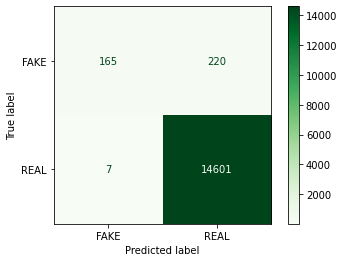

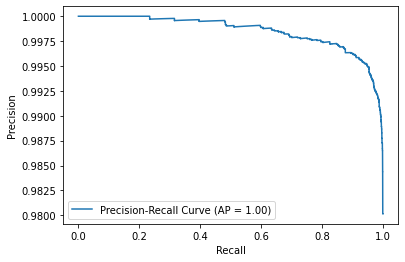

In [ ]:
#CatBoost Classifier
start = time.time()
catclf = CatBoostClassifier(verbose=0, n_estimators=100)

catclf.fit(X_train, y_train)

y_pred = catclf.predict(X_test)
end = time.time()
cat_time = end - start
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
cat_acc = round((100 * metrics.accuracy_score(y_test, y_pred)), 2)
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-Score:", metrics.f1_score(y_test, y_pred))
print("Confusion Matrix:", metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
cat_fp, cat_tp, thresh = roc_curve(y_test, y_pred)
plot_confusion_matrix(catclf, X_test, y_test, display_labels=['FAKE', 'REAL'], cmap='Greens', values_format="d")
plot_precision_recall_curve(catclf, X_test, y_test, name='Precision-Recall Curve')

## AdaBoost Classifier With CountVectorizer

Accuracy: 0.9791235910091376
Precision: 0.9827108799891943
Recall: 0.9960980284775466
F1-Score: 0.989359170491246
Confusion Matrix: [[  129   256]
 [   57 14551]]
              precision    recall  f1-score   support

           0       0.69      0.34      0.45       385
           1       0.98      1.00      0.99     14608

    accuracy                           0.98     14993
   macro avg       0.84      0.67      0.72     14993
weighted avg       0.98      0.98      0.98     14993



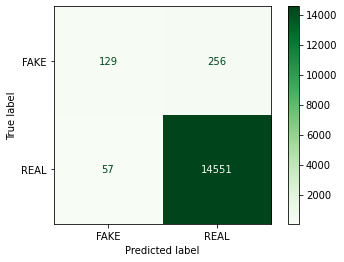

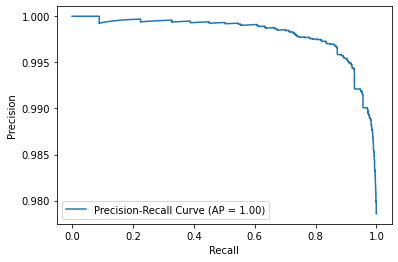

In [ ]:
# AdaBoost Classifier
start = time.time()
adaclf = AdaBoostClassifier()

adaclf.fit(X_train, y_train)

y_pred = adaclf.predict(X_test)
end = time.time()
ada_time = end - start
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
ada_acc = round((100 * metrics.accuracy_score(y_test, y_pred)), 2)
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-Score:", metrics.f1_score(y_test, y_pred))
print("Confusion Matrix:", metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
ada_fp, ada_tp, thresh = roc_curve(y_test, y_pred)
plot_confusion_matrix(adaclf, X_test, y_test, display_labels=['FAKE', 'REAL'], cmap='Greens', values_format="d")
plot_precision_recall_curve(adaclf, X_test, y_test, name='Precision-Recall Curve')

## Plotting Barchart of the Model Accuracies

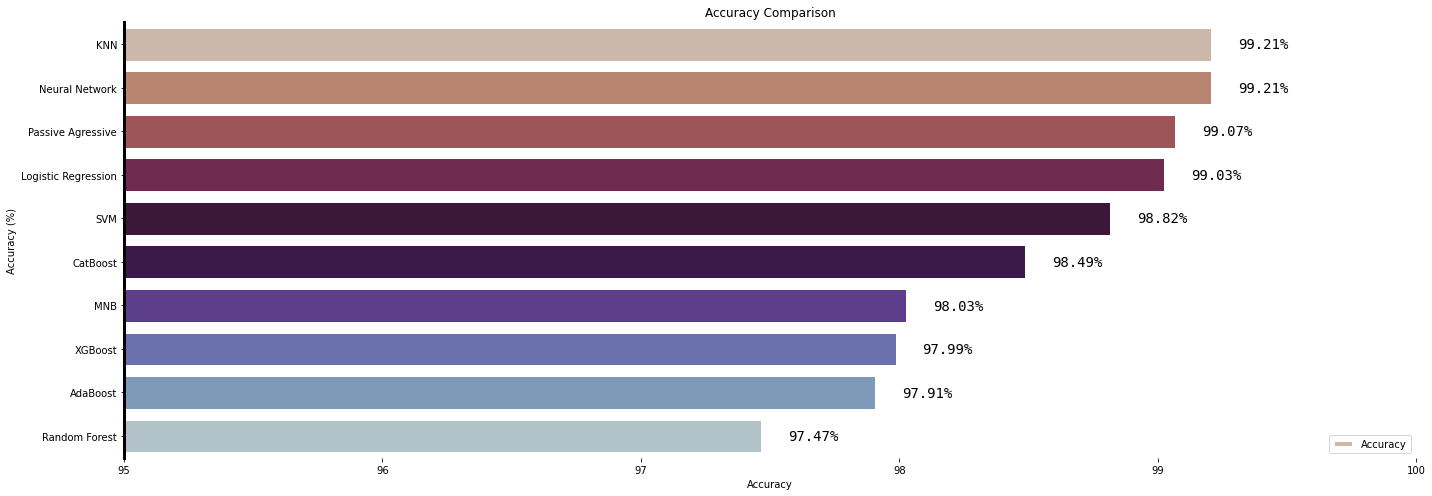

In [ ]:
accuracies={"SVM": svc_acc,
            "Logistic Regression": lr_acc,
            "MNB": mnb_acc,
            "Passive Agressive": passive_acc,
            "Random Forest": random_acc,
            "KNN": knn_acc,
            "Neural Network": nn_acc,
            "XGBoost": xgb_acc,
            "CatBoost": cat_acc,
            "AdaBoost": ada_acc}

acc_list=accuracies.items()
k,v = zip(*acc_list) 
temp=pd.DataFrame(index=k,data=v,columns=["Accuracy"])
temp.sort_values(by=["Accuracy"],ascending=False,inplace=True)

#Plot accuracy for different models
plt.figure(figsize=(20,7))
ACC=sns.barplot(y=temp.index,x=temp["Accuracy"],label="Accuracy",edgecolor="white",linewidth=3,orient="h",palette="twilight_r")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison")
plt.xlim(95,100)

ACC.spines['left'].set_linewidth(3)
for w in ['right', 'top', 'bottom']:
    ACC.spines[w].set_visible(False)
    
#Write text on barplots
k=0
for ACC in ACC.patches:
    width = ACC.get_width()
    plt.text(width+0.1, (ACC.get_y() + ACC.get_height()-0.3),s="{}%".format(temp["Accuracy"][k]),fontname = 'monospace', fontsize = 14, color = 'black') 
    k+=1
    
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

## Plotting BarChart of Execution Time of the Models

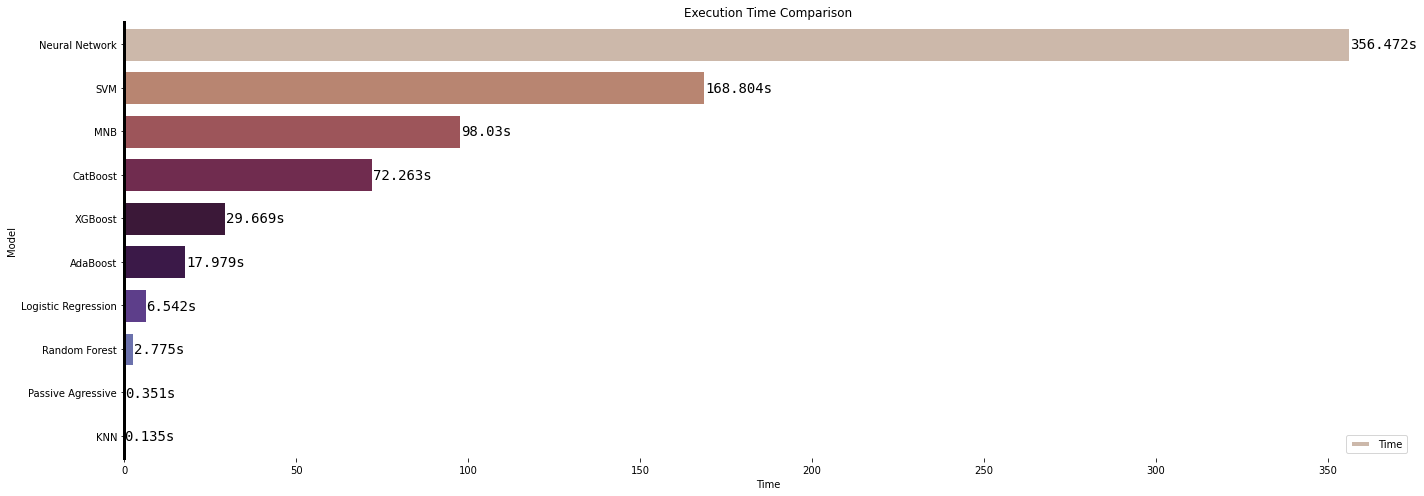

In [ ]:
exe_time={"SVM": svc_time,
            "Logistic Regression": lr_time,
            "MNB": mnb_acc,
            "Passive Agressive": passive_time,
            "Random Forest": random_time,
            "KNN": knn_time,
            "Neural Network": nn_time,
            "XGBoost": xgb_time,
            "CatBoost": cat_time,
            "AdaBoost": ada_time}

time_list=exe_time.items()
k,v = zip(*time_list) 
temp1=pd.DataFrame(index=k,data=v,columns=["Time"])
temp1.sort_values(by=["Time"],ascending=False,inplace=True)

#Plot accuracy for different models
plt.figure(figsize=(20,7))
ET=sns.barplot(y=temp1.index,x=temp1["Time"],label="Time",edgecolor="white",linewidth=3,orient="h",palette="twilight_r")
plt.ylabel("Model")
plt.title("Execution Time Comparison")
ET.spines['left'].set_linewidth(3)
for w in ['right', 'top', 'bottom']:
    ET.spines[w].set_visible(False)

#Write text on barplots
k=0
for ET in ET.patches:
    width = ET.get_width()
    plt.text(width+0.01, (ET.get_y() + ET.get_height()-0.3),s="{}s".format(round((temp1["Time"][k]),3)),fontname = 'monospace', fontsize = 14, color = 'black') 
    k+=1

plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

## Plotting ROC Curves of the Models

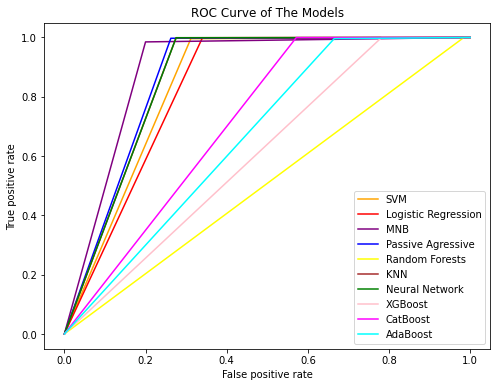

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(sv_fp,sv_tp,'orange',label = 'SVM')
plt.plot(lr_fp,lr_tp,'red',label = 'Logistic Regression')
plt.plot(mnb_fp,mnb_tp,'purple',label = 'MNB')
plt.plot(passive_fp,passive_tp,'blue',label = 'Passive Agressive')
plt.plot(random_fp,random_tp,'yellow',label = 'Random Forests')
plt.plot(knn_fp,knn_tp,'brown',label = 'KNN')
plt.plot(nn_fp,nn_tp,'green',label = 'Neural Network')
plt.plot(xgb_fp,xgb_tp,'pink',label = 'XGBoost')
plt.plot(cat_fp,cat_tp,'magenta',label = 'CatBoost')
plt.plot(ada_fp,ada_tp,'cyan',label = 'AdaBoost')

plt.legend("SVM", loc='lower right')
plt.legend("Logistic Regression", loc='lower right')
plt.legend("MNB", loc='lower right')
plt.legend("Passive Agressive", loc='lower right')
plt.legend("Random Forests", loc='lower right')
plt.legend("KNN", loc='lower right')
plt.legend("Neural Network", loc='lower right')
plt.legend("XGBoost", loc='lower right')
plt.legend("CatBoost", loc='lower right')
plt.legend("AdaBoost", loc='lower right')
plt.legend(loc='lower right')

plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title('ROC Curve of The Models')
plt.show()

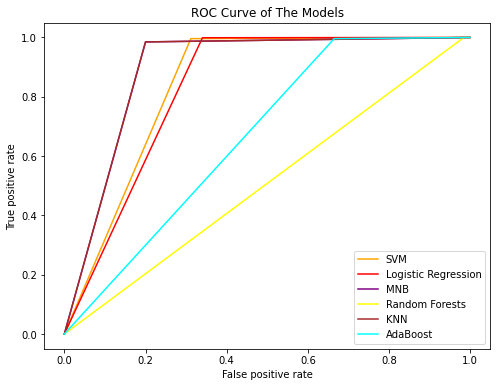

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(sv_fp,sv_tp,'orange',label = 'SVM')
plt.plot(lr_fp,lr_tp,'red',label = 'Logistic Regression')
plt.plot(mnb_fp,mnb_tp,'purple',label = 'MNB')
plt.plot(random_fp,random_tp,'yellow',label = 'Random Forests')
plt.plot(knn_fp,knn_tp,'brown',label = 'KNN')
plt.plot(ada_fp,ada_tp,'cyan',label = 'AdaBoost')

plt.legend("SVM", loc='lower right')
plt.legend("Logistic Regression", loc='lower right')
plt.legend("MNB", loc='lower right')
plt.legend("Random Forests", loc='lower right')
plt.legend("KNN", loc='lower right')
plt.legend("AdaBoost", loc='lower right')
plt.legend(loc='lower right')

plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title('ROC Curve of The Models')
plt.show()